In [ ]:
# prompt: generate a synthetic over-fitted dataset with features like promotion budget, price discount, customer traffic,
# and seasonality factor, competition index, and customer churn. The target variable is retail sales, which
# has been computed based on a linear combination of the features with added noise.

import numpy as np
import pandas as pd

def generate_overfit_dataset(n_samples=100, noise_level=0.1):
    # Generate random features
    promotion_budget = np.random.rand(n_samples) * 10000
    price_discount = np.random.rand(n_samples) * 0.5
    customer_traffic = np.random.randint(100, 1000, size=n_samples)
    seasonality_factor = np.random.rand(n_samples)
    competition_index = np.random.rand(n_samples) * 5
    customer_churn = np.random.rand(n_samples) * 0.2

    # Create a synthetic relationship with noise
    retail_sales = (
        2 * promotion_budget
        + 5000 * price_discount
        + 0.5 * customer_traffic
        + 1000 * seasonality_factor
        - 500 * competition_index
        - 2000 * customer_churn
        + np.random.normal(0, noise_level * 10000, size=n_samples)  # Added noise
    )
    retail_sales = np.maximum(0, retail_sales) # Make sure sales are not negative


    # Create a Pandas DataFrame
    data = pd.DataFrame({
        "promotion_budget": promotion_budget,
        "price_discount": price_discount,
        "customer_traffic": customer_traffic,
        "seasonality_factor": seasonality_factor,
        "competition_index": competition_index,
        "customer_churn": customer_churn,
        "retail_sales": retail_sales
    })

    return data

# Generate the dataset
synthetic_data = generate_overfit_dataset(n_samples=500, noise_level=0.05)

# Display the first few rows of the dataset
print(synthetic_data.head())

#Further processing (example: save to CSV)
#synthetic_data.to_csv('synthetic_retail_sales_data.csv', index=False)


   promotion_budget  price_discount  customer_traffic  seasonality_factor  \
0       9401.196491        0.069933               278            0.699259   
1       9488.804267        0.095948               857            0.717495   
2       2713.104509        0.289965               131            0.461574   
3       7316.958250        0.314109               874            0.535300   
4         94.951089        0.344292               778            0.008051   

   competition_index  customer_churn  retail_sales  
0           2.094221        0.077250  18945.604464  
1           0.849190        0.151745  20861.031567  
2           2.151717        0.151308   5915.811985  
3           2.542689        0.107718  15258.215794  
4           2.116815        0.033895    738.928212  


In [ ]:
synthetic_data

,promotion_budget,price_discount,customer_traffic,seasonality_factor,competition_index,customer_churn,retail_sales
0,9401.196491,0.069933,278,0.699259,2.094221,0.077250,18945.604464
1,9488.804267,0.095948,857,0.717495,0.849190,0.151745,20861.031567
2,2713.104509,0.289965,131,0.461574,2.151717,0.151308,5915.811985
3,7316.958250,0.314109,874,0.535300,2.542689,0.107718,15258.215794
4,94.951089,0.344292,778,0.008051,2.116815,0.033895,738.928212
...,...,...,...,...,...,...,...
495,3667.151788,0.129622,989,0.251901,0.497423,0.016160,8668.418415
496,7892.835693,0.239841,103,0.763497,0.116246,0.105536,17311.714078
497,5700.857730,0.342282,567,0.772716,1.134506,0.023626,14265.283720
498,496.460614,0.133590,136,0.344638,3.434797,0.128062,27.466100


In [ ]:
data=synthetic_data
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X= data.iloc[:,0:6]
y=data.iloc[:,-1]
X

,promotion_budget,price_discount,customer_traffic,seasonality_factor,competition_index,customer_churn
0,9401.196491,0.069933,278,0.699259,2.094221,0.077250
1,9488.804267,0.095948,857,0.717495,0.849190,0.151745
2,2713.104509,0.289965,131,0.461574,2.151717,0.151308
3,7316.958250,0.314109,874,0.535300,2.542689,0.107718
4,94.951089,0.344292,778,0.008051,2.116815,0.033895
...,...,...,...,...,...,...
495,3667.151788,0.129622,989,0.251901,0.497423,0.016160
496,7892.835693,0.239841,103,0.763497,0.116246,0.105536
497,5700.857730,0.342282,567,0.772716,1.134506,0.023626
498,496.460614,0.133590,136,0.344638,3.434797,0.128062


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train
X_test

array([[ 6.57992438e-01,  6.31723515e-01, -1.88274619e-01,
         9.21832422e-01, -3.45298503e-01,  7.80843333e-01],
       [ 2.55780518e-01, -9.07613958e-01, -1.50125821e+00,
        -1.41472720e+00,  1.90986362e-02, -4.41921131e-01],
       [ 4.71083645e-01,  1.64649796e+00, -7.78514947e-01,
         1.58989301e+00, -8.08020110e-01, -1.24216142e+00],
       [-1.13000982e+00,  5.03877738e-01,  5.42499121e-01,
        -4.31052786e-01, -1.49629318e+00, -1.28871112e+00],
       [-1.45077600e+00,  5.24483888e-01,  5.34468640e-01,
         6.21547356e-01,  2.71227451e-01, -8.75709459e-01],
       [ 7.34969209e-01, -8.15135499e-01,  1.58244637e+00,
        -3.28852137e-01,  3.51283402e-01, -1.35193550e+00],
       [ 9.17815717e-01,  8.60209287e-01, -1.50928869e+00,
        -5.65018321e-01,  9.77377465e-01,  5.77315053e-01],
       [ 4.01926834e-01,  1.50294242e+00,  1.30137954e+00,
        -1.27869356e+00, -4.78124048e-01,  1.12860359e+00],
       [-7.28113666e-01,  1.34728725e-01, -1.689

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.5),
    "Ridge Regression": Ridge(alpha=0.5)
}
mse_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_results[name] = (mse_train, mse_test)

    print(f"{name}: Train MSE = {mse_train:.4f}, Test MSE = {mse_test:.4f}")

Linear Regression: Train MSE = 276052.1712, Test MSE = 284024.2830
Lasso Regression: Train MSE = 276053.6841, Test MSE = 284034.2052
Ridge Regression: Train MSE = 276108.3106, Test MSE = 283462.8003


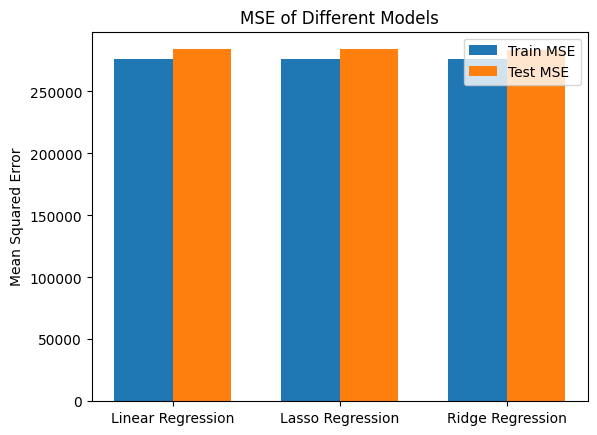

In [ ]:
labels = list(mse_results.keys())
mse_train_vals = [mse_results[model][0] for model in labels]
mse_test_vals = [mse_results[model][1] for model in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mse_train_vals, width, label='Train MSE')
rects2 = ax.bar(x + width/2, mse_test_vals, width, label='Test MSE')

ax.set_ylabel('Mean Squared Error')
ax.set_title('MSE of Different Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model_ann = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_ann.compile(optimizer='adam', loss='mse')

In [ ]:
history = model_ann.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 150577824.0000 - val_loss: 146344144.0000
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 151740560.0000 - val_loss: 146329936.0000
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 142178720.0000 - val_loss: 146311008.0000
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 137731296.0000 - val_loss: 146284992.0000
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 147370272.0000 - val_loss: 146249424.0000
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 143324384.0000 - val_loss: 146202624.0000
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 147255808.0000 - val_loss: 146139952.0000
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 140907712.0000 - val_loss: 146058496.0000
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 134765648.0000 - val_loss: 145954448.0000
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 140048784.0000 - val_loss: 14582068

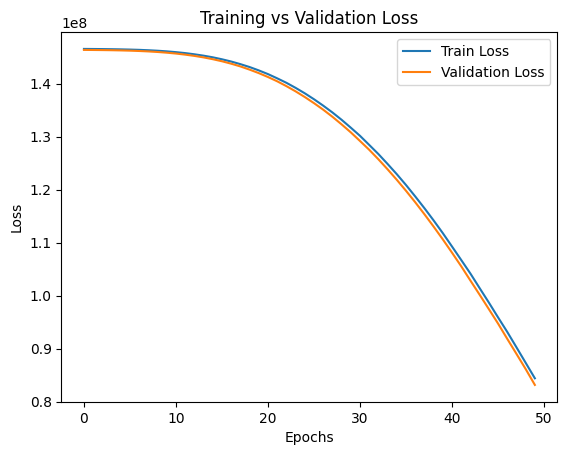

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()